# Чтение и предобработка данных ионосферного зондирования

## Импорт библиотек

In [32]:
import numpy as np
#from parse import parse
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt


In [ ]:
# Функция для преобразования строки даты и времени в np.datetime64
def parse_datetime(date_str, time_str):
    dt_str = f"{date_str.decode('utf-8')} {time_str.decode('utf-8')}"
    return np.datetime64(datetime.strptime(dt_str, '%Y.%m.%d %H:%M:%S'))

In [46]:
# Чтение данных из файла
def load_file(filename):
    data = np.loadtxt(filename, usecols=(3, 5, 7), 
                 encoding="cp1251",
                 dtype={'names': ('date', 'time', 'freq'),
                     'formats': ('S10', 'S10', 'f')},
                )
    # Объединение даты и времени в np.datetime64
    datetime_array = np.array([parse_datetime(row['date'], row['time']) for row in data])
    
    # Создаем DataFrame
    df = pd.DataFrame({
        'datetime': datetime_array,
        'freq': data['freq']
    })
    return df

In [65]:
# Загружаем данные из нескольких файлов
file_names = ["M20231015.txt", "M20231012.txt", "M20231011.txt"]
dataframes = [load_file(fname) for fname in file_names]

# Объединяем все DataFrame по столбцу 'datetime'
merged_df = pd.concat(dataframes, ignore_index=True)

merged_df['month_year_time'] = merged_df['datetime'].dt.floor('5T').dt.strftime('%Y-%m %H:%M')


C:\Users\sobolevay\AppData\Local\Temp\ipykernel_9084\948549062.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  merged_df['month_year_time'] = merged_df['datetime'].dt.floor('5T').dt.strftime('%Y-%m %H:%M')


In [71]:
# Группируем с точностью до 5 минут и вычисляем статистику
# Год-месяц и время с точностью до 5 минут
result_df = merged_df.groupby(pd.Grouper(key='month_year_time')).agg(
    count=('freq', 'size'),  # Количество измерений
    mean_freq=('freq', 'mean'),  # Среднее значение
    std_freq=('freq', 'std')  # Стандартное отклонение
).reset_index()


result_df['time'] = pd.to_datetime(result_df['month_year_time'], format='%Y-%m %H:%M')
# Выводим результат
print(result_df)

    month_year_time  count  mean_freq  std_freq                time
0     2023-10 00:00      2  10.136400  0.030406 2023-10-01 00:00:00
1     2023-10 00:05      2  10.081850  0.107551 2023-10-01 00:05:00
2     2023-10 00:10      2  10.024855  0.188154 2023-10-01 00:10:00
3     2023-10 00:15      2   9.492690  0.080639 2023-10-01 00:15:00
4     2023-10 00:20      2   9.758750  0.779444 2023-10-01 00:20:00
..              ...    ...        ...       ...                 ...
283   2023-10 22:50      2   7.839180  0.053754 2023-10-01 22:50:00
284   2023-10 22:55      2   9.727110  2.329479 2023-10-01 22:55:00
285   2023-10 23:20      2   8.333335  0.465892 2023-10-01 23:20:00
286   2023-10 23:25      2   9.929850  0.286731 2023-10-01 23:25:00
287   2023-10 22:40      1   8.130600       NaN 2023-10-01 22:40:00

[288 rows x 5 columns]


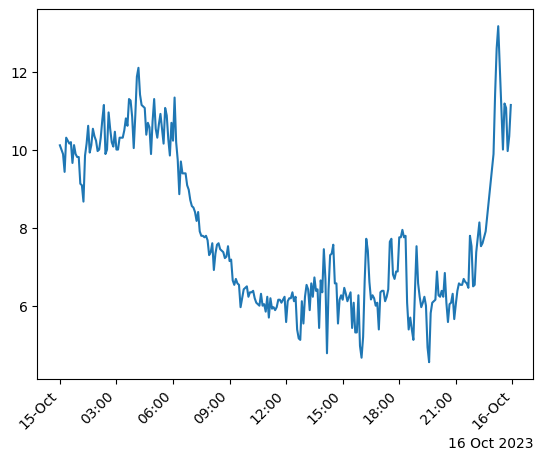

In [68]:
plt.xticks(rotation=45, ha='right')
plt.plot(datetime_array, data['freq'])

plt.show();

In [69]:
plt.plot(result_df['time'], result_df['mean_freq'])

KeyError: 'time'